### <center><h2>A study of food consumption in the world</h2></center>

###### DS102 Project Assignment | Barbara Yam, Ong Yong Kiat
<hr>

### Executive Summary

Food security is a basic human rights and is a major concern for all countries in the world today. Out of the 17 Sustainable Development Goals (SDGs) set by United Nations (UN) in September 2015 that are set to be achieved by 2030, global hunger is the number two goal:

    - Goal 2: End hunger, achieve food security and improved nutrition and promote sustainable agriculture

Proper nutrition for the development and sustenance of human beings requires adequate quantity of food as well as the necessary quality of food, which includes essential building blocks of life derived from macronutrients such as proteins and fats. While some countries may have abundance of food supply (even leading to excessive food wastage), other countries still regularly suffer from hunger and malnutrition.

### Introduction/Problem statement


This report aims to give a brief overview analysis of the trends of food supply around the world and investigates the current inequality of food security between different world regions. It also explores the progress of food supply over time to observe if there is any improvements over the course of history.

The objectives of this report are as follows: 

- Study the trend of food supply available for consumption per person (Daily per capita food supply by world region, measured on the basis of average caloric supply (kilocalories per person per day))

- Study the quality of food supply through investigating protein and fat supply by world region

- Analyse the correlation between food supply and GDP per capita

The study will include observations across 53 years, from Year 1961 to 2013.

### Dataset

Data on the world food supply was obtained from the **Food and Agriculture Organization of the United Nations (FAO)**.
FAOStats Database (Food Balance Sheets). The link is (http://www.fao.org/faostat/en/#data/FBS) .

Data on the GDP per capita was obtained from **The World Bank**.
The link is [GDP per capita (current US$)](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

Most data were in the form of CSV files, hence only data mining from csv files techniques were required.

<u> Additional resources referenced: </u>
- [UN Sustainable Development Goal 2 / Zero Hunger](https://sdg-tracker.org/zero-hunger)

In [23]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set()

### Methodology 

The data is obtained from FAOStat. 
We download 3 different csv file, each containing food supply (kcal/capita/day), protein supply quantity (g/capita/day) and fat supply quantity (g/capita/day)

Data cleaning: The first thing we would do is to clean the data to ensure that there are no null entries and to ensure that all the values are measured to the same unit. 

We would read the data and grouped them by different world regions: namely World, Africa, North and South America, 
Asia, Europe and Oceania. 

This will enable us to see if there are trends in food supply, protein supply, and fat supply in the world from 1961 to 2013. 

In addition, we will also download a csv file pertaining to GDP/capita to investigate if there
is a correlation between food quality and GDP. 

In [24]:
food_supply_df = pd.read_csv('food_supply.csv')
protein_supply_df = pd.read_csv('protein_supply.csv')
fat_supply_df = pd.read_csv('fat_supply.csv')
GDP_per_capita_df = pd.read_csv('GDP_per_capita.csv',skiprows=3)

### Data Cleaning

The first step is to ensure that there are no empty values in our dataset.
We will run through each of our datasets for null values and also refine the data by dropping
columns with data that is superfluous to our research. 

To convert g/capita/day to kcal/capita/day, we multiply each value by 4.

We also segment the data according to world regions, namely World (total), Africa, North America,
South America, Asia, Europe, Oceania (New Zealand and Australia). 

In [3]:
food_supply_df.info()

food_supply_df.shape
food_supply_df.head()

food_supply_df['Country'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
Domain     371 non-null object
Country    371 non-null object
Element    371 non-null object
Item       371 non-null object
Year       371 non-null int64
Unit       371 non-null object
Value      371 non-null int64
dtypes: int64(2), object(5)
memory usage: 20.4+ KB


array(['World', 'Africa', 'Northern America', 'South America', 'Asia',
       'Europe', 'Oceania'], dtype=object)

In [29]:
protein_supply_df.info()
protein_supply_df.shape
protein_supply_df['kcal/capita/day'] = protein_supply_df['Value']*4

protein_supply_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
Domain     371 non-null object
Country    371 non-null object
Element    371 non-null object
Item       371 non-null object
Year       371 non-null int64
Unit       371 non-null object
Value      371 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.4+ KB


,Domain,Country,Element,Item,Year,Unit,Value,kcal/capita/day
0,Food Balance Sheets,World,Protein supply quantity (g/capita/day),Grand Total,1961,g/capita/day,61.46,245.84
1,Food Balance Sheets,World,Protein supply quantity (g/capita/day),Grand Total,1962,g/capita/day,62.56,250.24
2,Food Balance Sheets,World,Protein supply quantity (g/capita/day),Grand Total,1963,g/capita/day,62.83,251.32
3,Food Balance Sheets,World,Protein supply quantity (g/capita/day),Grand Total,1964,g/capita/day,63.30,253.20
4,Food Balance Sheets,World,Protein supply quantity (g/capita/day),Grand Total,1965,g/capita/day,63.49,253.96


In [30]:
fat_supply_df.info()
fat_supply_df.shape
fat_supply_df['kcal/capita/day'] = fat_supply_df['Value']*4
fat_supply_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
Domain     371 non-null object
Country    371 non-null object
Element    371 non-null object
Item       371 non-null object
Year       371 non-null int64
Unit       371 non-null object
Value      371 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.4+ KB


,Domain,Country,Element,Item,Year,Unit,Value,kcal/capita/day
0,Food Balance Sheets,World,Fat supply quantity (g/capita/day),Grand Total,1961,g/capita/day,47.52,190.08
1,Food Balance Sheets,World,Fat supply quantity (g/capita/day),Grand Total,1962,g/capita/day,48.85,195.40
2,Food Balance Sheets,World,Fat supply quantity (g/capita/day),Grand Total,1963,g/capita/day,49.90,199.60
3,Food Balance Sheets,World,Fat supply quantity (g/capita/day),Grand Total,1964,g/capita/day,50.57,202.28
4,Food Balance Sheets,World,Fat supply quantity (g/capita/day),Grand Total,1965,g/capita/day,51.24,204.96


There are 371 rows and 7 columns with no null values and each entry is in its correct type, in each column. We decided to refine our datasets by dropping columns such as domain and item, instead. 

In [31]:
new_food_df = food_supply_df.drop(columns=['Domain', 'Item'])
new_protein_df = protein_supply_df.drop(columns=['Domain', 'Item'])
new_fat_df = fat_supply_df.drop(columns=['Domain','Item'])

new_fat_df.head()

,Country,Element,Year,Unit,Value,kcal/capita/day
0,World,Fat supply quantity (g/capita/day),1961,g/capita/day,47.52,190.08
1,World,Fat supply quantity (g/capita/day),1962,g/capita/day,48.85,195.40
2,World,Fat supply quantity (g/capita/day),1963,g/capita/day,49.90,199.60
3,World,Fat supply quantity (g/capita/day),1964,g/capita/day,50.57,202.28
4,World,Fat supply quantity (g/capita/day),1965,g/capita/day,51.24,204.96


For GDP per capita, we are interested in World data, from 1961 to 2013; 
hence filtering out the other years. 

In [32]:
World_GDP_per_capita = GDP_per_capita_df[GDP_per_capita_df['Country Name']=='World']

World_GDP_per_capita = World_GDP_per_capita.drop(columns = ['Country Name', 'Indicator Name','Country Code', 'Indicator Code', '1960','2014','2015','2016','2017','2018'])
World_GDP_per_capita = World_GDP_per_capita.transpose().reset_index()
World_GDP_per_capita.columns=['Year','GDP/capita']
World_GDP_per_capita.head()

,Year,GDP/capita
0,1961,464.200802
1,1962,489.897304
2,1963,516.720483
3,1964,554.820601
4,1965,591.868256


There are now no more empty entries in all our datasets, and the data is prepped for analysis.  

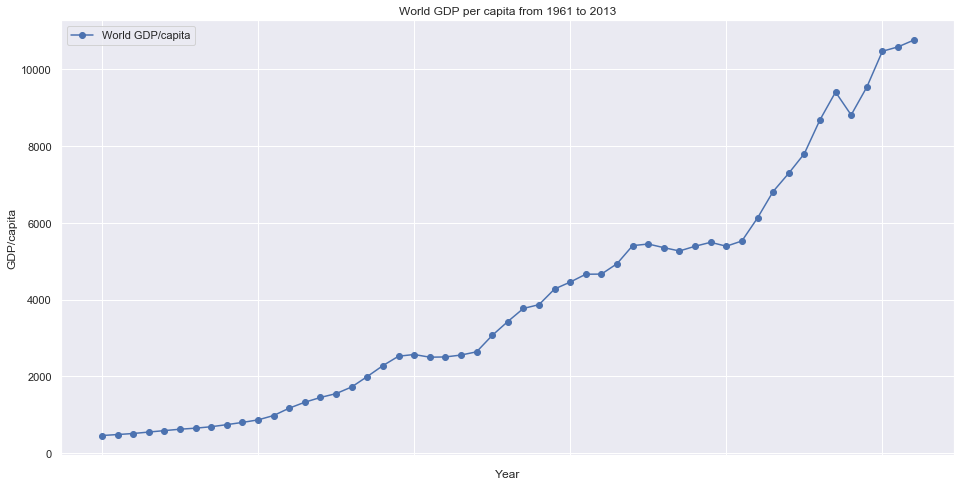

In [36]:
fig, ax = plt.subplots()

World_GDP_per_capita.plot(kind='line',x='Year',y='GDP/capita',ax=ax, marker="o",figsize=(16,8))
ax.set_title('World GDP per capita from 1961 to 2013')
ax.set_ylabel('GDP/capita')
#ax.set_xticks(range(1961, 2014))

ax.legend(['World GDP/capita'])

From the graph, world GDP per capita has been steadily rising in the world from 1961 to 2013. In the second part of our report, we shall examine if there is a correlation between rising GDP and the food supply per person. 

### Methodology (Part 1)

To study the quality of food supply, we will investigate the proportion of protein and fat in proportion 
to the average food consumption. 

In order to convert g/capita/day to kcal/capita/day, we will multiply each kcal by 4. 

In [37]:
combined_protein_total_df = pd.merge(new_food_df, new_protein_df, on=['Year','Country'])
combined_protein_total_df['proportion_protein'] = combined_protein_total_df['kcal/capita/day']/combined_protein_total_df['Value_x']*100
combined_protein_total_df.head(12)

combined_protein_world_df = combined_protein_total_df[combined_protein_total_df['Country']=='World']
combined_protein_africa_df = combined_protein_total_df[combined_protein_total_df['Country']=='Africa']
combined_protein_asia_df = combined_protein_total_df[combined_protein_total_df['Country']=='Asia']
combined_protein_na_df = combined_protein_total_df[combined_protein_total_df['Country']=='Northern America']
combined_protein_sa_df = combined_protein_total_df[combined_protein_total_df['Country']=='South America']
combined_protein_europe_df = combined_protein_total_df[combined_protein_total_df['Country']=='Europe']
combined_protein_oceania_df = combined_protein_total_df[combined_protein_total_df['Country']=='Oceania']

In [38]:
new_protein_df.groupby('Country').tail(3)

,Country,Element,Year,Unit,Value,kcal/capita/day
50,World,Protein supply quantity (g/capita/day),2011,g/capita/day,80.50,322.00
51,World,Protein supply quantity (g/capita/day),2012,g/capita/day,80.78,323.12
52,World,Protein supply quantity (g/capita/day),2013,g/capita/day,81.23,324.92
103,Africa,Protein supply quantity (g/capita/day),2011,g/capita/day,69.30,277.20
104,Africa,Protein supply quantity (g/capita/day),2012,g/capita/day,69.03,276.12
105,Africa,Protein supply quantity (g/capita/day),2013,g/capita/day,69.10,276.40
156,Northern America,Protein supply quantity (g/capita/day),2011,g/capita/day,108.15,432.60
157,Northern America,Protein supply quantity (g/capita/day),2012,g/capita/day,109.18,436.72
158,Northern America,Protein supply quantity (g/capita/day),2013,g/capita/day,109.13,436.52
209,South America,Protein supply quantity (g/capita/day),2011,g/capita/day,85.66,342.64


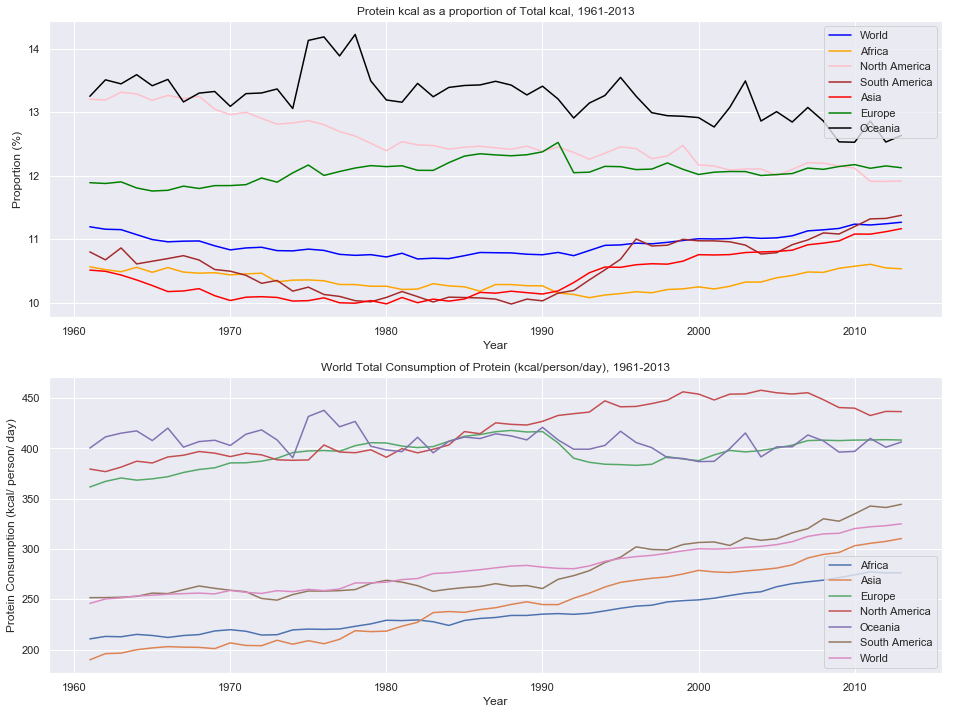

In [39]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(211)
ax1=fig.add_subplot(212)

combined_protein_world_df.plot(kind='line', x='Year', y='proportion_protein', ax=ax,color='blue')
combined_protein_africa_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='orange')
combined_protein_na_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='pink')
combined_protein_sa_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='brown')
combined_protein_asia_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='red')
combined_protein_europe_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='green')
combined_protein_oceania_df.plot(kind='line', x='Year',y='proportion_protein',ax=ax,color='black')

new_protein_df.groupby('Country').plot(kind='line',x='Year', y='kcal/capita/day',ax=ax1)
ax.set_title("Protein kcal as a proportion of Total kcal, 1961-2013")
ax1.set_title("World Total Consumption of Protein (kcal/person/day), 1961-2013")
ax.legend(['World','Africa','North America','South America','Asia','Europe','Oceania'])
ax1.legend(['Africa','Asia','Europe','North America','Oceania','South America','World'])
ax.set_ylabel("Proportion (%)")
ax1.set_ylabel("Protein Consumption (kcal/ person/ day)")
ax.set_xlabel("Year")
ax1.set_xlabel("Year")
plt.show()

As observed in the second graph, there is a distinct disparity between 2 groups of world regions. North America, Europe and Oceania world regions have markedly higher protein consumption per person per day (above 400kcal/person/day in 2013) while world regions like South America, Asia and Africa showed lower protein consumption per person per day (around 300kcal/person/day in 2013). This trend is consistent from 1961 to 2013. Overall, the world average is estimated at around 320kcal/person/day in 2013.

Proportion of proteins in the first graph also showed the same observations. North America, Europe and Oceania world regions showed higher proportion of proteins in their diet while South America, Asia and Africa regions have lesser proportions of protein in their diet.

In [40]:
combined_fat_total_df = pd.merge(new_food_df, new_fat_df, on=['Year','Country'])
combined_fat_total_df['proportion_fat'] = combined_fat_total_df['Value_y']/combined_fat_total_df['Value_x']*100

combined_fat_world_df = combined_fat_total_df[combined_fat_total_df['Country']=='World']
combined_fat_africa_df = combined_fat_total_df[combined_fat_total_df['Country']=='Africa']
combined_fat_asia_df = combined_fat_total_df[combined_fat_total_df['Country']=='Asia']
combined_fat_na_df = combined_fat_total_df[combined_fat_total_df['Country']=='Northern America']
combined_fat_sa_df = combined_fat_total_df[combined_fat_total_df['Country']=='South America']
combined_fat_europe_df = combined_fat_total_df[combined_fat_total_df['Country']=='Europe']
combined_fat_oceania_df = combined_fat_total_df[combined_fat_total_df['Country']=='Oceania']

In [13]:
new_fat_df.groupby('Country').tail(3)

,Country,Element,Year,Unit,Value,kcal/capita/day
50,World,Fat supply quantity (g/capita/day),2011,g/capita/day,82.41,329.64
51,World,Fat supply quantity (g/capita/day),2012,g/capita/day,82.83,331.32
52,World,Fat supply quantity (g/capita/day),2013,g/capita/day,82.76,331.04
103,Africa,Fat supply quantity (g/capita/day),2011,g/capita/day,55.16,220.64
104,Africa,Fat supply quantity (g/capita/day),2012,g/capita/day,54.99,219.96
105,Africa,Fat supply quantity (g/capita/day),2013,g/capita/day,54.46,217.84
156,Northern America,Fat supply quantity (g/capita/day),2011,g/capita/day,160.51,642.04
157,Northern America,Fat supply quantity (g/capita/day),2012,g/capita/day,160.92,643.68
158,Northern America,Fat supply quantity (g/capita/day),2013,g/capita/day,160.10,640.40
209,South America,Fat supply quantity (g/capita/day),2011,g/capita/day,99.36,397.44


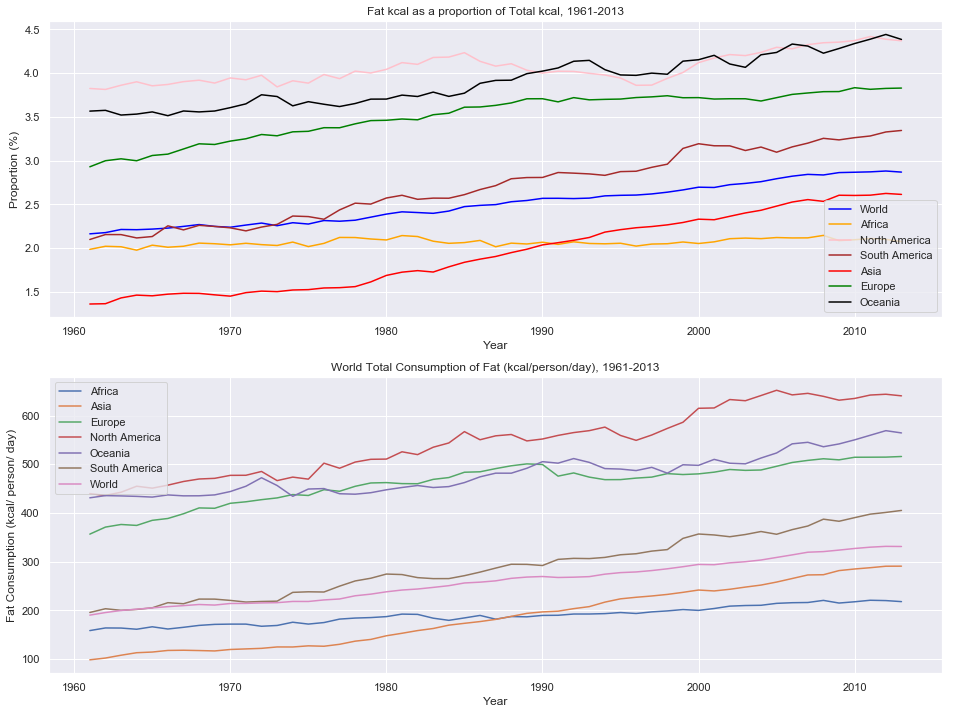

In [41]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(211)
ax1=fig.add_subplot(212)

combined_fat_world_df.plot(kind='line', x='Year', y='proportion_fat', ax=ax,color='blue')
combined_fat_africa_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='orange')
combined_fat_na_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='pink')
combined_fat_sa_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='brown')
combined_fat_asia_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='red')
combined_fat_europe_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='green')
combined_fat_oceania_df.plot(kind='line', x='Year',y='proportion_fat',ax=ax,color='black')

new_fat_df.groupby('Country').plot(kind='line',x='Year', y='kcal/capita/day',ax=ax1)
ax.set_title("Fat kcal as a proportion of Total kcal, 1961-2013")
ax1.set_title("World Total Consumption of Fat (kcal/person/day), 1961-2013")
ax.legend(['World','Africa','North America','South America','Asia','Europe','Oceania'])
ax1.legend(['Africa','Asia','Europe','North America','Oceania','South America','World'])
ax.set_ylabel("Proportion (%)")
ax1.set_ylabel("Fat Consumption (kcal/ person/ day)")
ax.set_xlabel("Year")
ax1.set_xlabel("Year")
plt.show()

Observations for the graphs plotted for fat proportion and total consumption also showed similarly trends and results with the graphs plotted for protein proportion and total consumption.

World regions like North America, Europe and Oceania also showed higher fat total consumption and proportion in their diet while other regions like in South America, Asia and Africa displayed lower fat total consumption and proportion.

This 2 observations from the protein graphs and the fat graphs may highlight the quality of food in each of the regions, which may indicate that regions in North America, Europe and Oceania tend to have better quality food on average while regions in South America, Asia and Africa have lower quality food on average.

### Methodology - Part 2

Finally, we consider if there is a correlation between the World GDP and World food supply. The world total food consumption is first plotted to observe the trends.

In [42]:
new_food_df.groupby('Country').tail(3)

,Country,Element,Year,Unit,Value
50,World,Food supply (kcal/capita/day),2011,kcal/capita/day,2869
51,World,Food supply (kcal/capita/day),2012,kcal/capita/day,2874
52,World,Food supply (kcal/capita/day),2013,kcal/capita/day,2884
103,Africa,Food supply (kcal/capita/day),2011,kcal/capita/day,2614
104,Africa,Food supply (kcal/capita/day),2012,kcal/capita/day,2618
105,Africa,Food supply (kcal/capita/day),2013,kcal/capita/day,2624
156,Northern America,Food supply (kcal/capita/day),2011,kcal/capita/day,3632
157,Northern America,Food supply (kcal/capita/day),2012,kcal/capita/day,3667
158,Northern America,Food supply (kcal/capita/day),2013,kcal/capita/day,3663
209,South America,Food supply (kcal/capita/day),2011,kcal/capita/day,3027


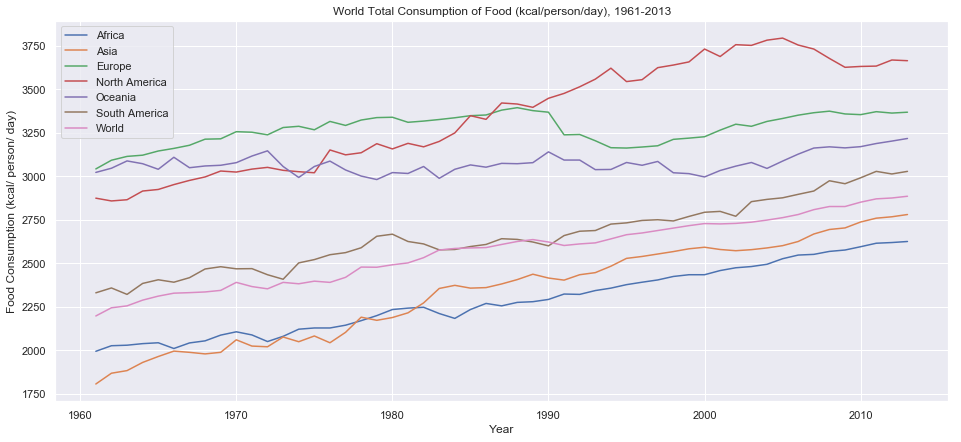

In [16]:
fig = plt.figure(figsize=(16,7))
ax1=fig.add_subplot(111)

new_food_df.groupby('Country').plot(kind='line',x='Year', y='Value',ax=ax1)
ax1.set_title("World Total Consumption of Food (kcal/person/day), 1961-2013")
ax1.legend(['Africa','Asia','Europe','North America','Oceania','South America','World'])
ax1.set_ylabel("Food Consumption (kcal/ person/ day)")
ax1.set_xlabel("Year")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


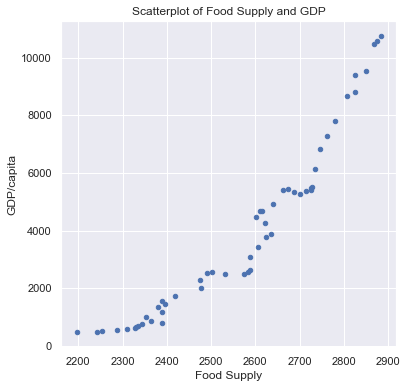

In [17]:
food_supply1_df = new_food_df[new_food_df['Country'] == 'World']

food_supply1_df = pd.concat([food_supply1_df, World_GDP_per_capita], axis=1)

fig, ax = plt.subplots(figsize=(6,6))
food_supply1_df.plot(kind='scatter',ax=ax, x ='Value', y='GDP/capita')
plt.ylabel('GDP/capita')
plt.xlabel('Food Supply')
ax.set_title('Scatterplot of Food Supply and GDP')

food_supply1_df['Value'].corr(food_supply1_df['GDP/capita'])

plt.show()

On the graph for world total food consumption, similar trends are also observed. World regions like North America, Europe and Oceania showed higher total food consumption while other regions like South America, Asia and Africa showed lower total food consumption.

In the scatterplot of food supply and GDP, there seems to be a relationship between the two; Correlation coeefficient is calculated to be 0.9497831702774864.
However, from examining the scatter graph, it seems that there is a non-linear exponential relationship.
As GDP increases over the years in the world, food supply has also increased exponentially. 
It is also likely that world population has increased. 

This also seems to dispel Malthusian beliefs that the growth of the food supply is linear. 
As the world becomes richer, with the rise of GDP, it is possible that there are better technologies
in growing better quality food. 

## Conclusion 

Trends of world total food consumption, protein consumption and fat consumption in conjunction with GDP/capita data were explored in this report. Similar trends showed that 2 distinct regions with different food, protein and fat consumption profile as discussed in the sections above. This could be attributed to GDP/capita of each regions where the regions with more countries with lesser GDP/capita could suffer from lower quality of food and lesser overall consumption quantity while the regions with more countries with higher GDP/capita could put them in a better position to obtain higher quality of food and higher overall consumption quantity. This would definitely contributed to a better nutrition of the countries who have higher GDP/capita. Of course, GDP/capita is but only one factor. Other factors could also influenced the amount of food each country could have as well.

Overall, trends were plotted from 1961 to 2013 which also showed that there are improvements as a whole for each regions in the total food, protein and fat consumption. This could also be seen as a good progress as on a whole, the world and each regions have improved in better nutrition for the development and sustainability of human beings.